# Plants
In this notebook, I extract plant genera habitats in north America. The main product is a Boolean matrix `X`, where each row is a plant genus, each column is a state, and `X`<sub>ij</sub> is `True` if a plant appears is a state and `False` otherwise. In fact, some columns are provinces or just areas, not states, but we call them states anyway.

## Prerequisites
Before running this notebook, one needs to download a dataset from https://archive.ics.uci.edu/ml/datasets/Plants. Click the link `Data Folder` and then download everything there. Put these files in `datasets/plants/`. </br>
The resulting directory structure is like

In [1]:
! tree ../datasets/plants/

../datasets/plants/
├── plants.data
├── plants.names
└── stateabbr.txt

0 directories, 3 files


In fact, only the file `plants.data` is necessary. Nevertheless, the other files contain useful information and are worth a look. </br>
The file `stateabbr.txt` has mistakes in it. Two state abbreviations `ab` and `al` are mixed up. Swapping them keeps everything in order. https://oneeman.github.io/blog/2017/04/24/plants-k-means-clustering.html makes me aware of this.

## The program starts here

In [2]:
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from cycler import cycler
%matplotlib inline
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 40)
mpl.rcdefaults()

from itertools import islice
import pickle

In [3]:
with open('../datasets/plants/plants.data', 'r', encoding='iso8859_1') as f:
    lines = f.readlines()
lines = [line.strip().split(',') for line in lines]
len(lines), sys.getsizeof(lines)

(34781, 285376)

In [4]:
names = [line[0] for line in lines]
locations = [['dengl' if s == 'gl' else s for s in islice(line, 1, None)] for line in lines]
del lines
# I think dengl and gl are the same. Both exist in the dataset.

In [5]:
states = [
'ab','ak','ar','az','ca','co','ct','de','dc','fl','ga','hi','id','il',
'in','ia','ks','ky','la','me','md','ma','mi','mn','ms','mo','mt','ne',
'nv','nh','nj','nm','ny','nc','nd','oh','ok','or','pa','pr','ri','sc',
'sd','tn','tx','ut','vt','va','vi','wa','wv','wi','wy',
    
'al','bc','mb','nb','lb','nf','nt','ns','nu','on','pe','qc','sk','yt',
    
'dengl', 'fraspm',
]
len(states)

69

In [6]:
df = pd.DataFrame(
    data=np.zeros((len(locations), len(states)), dtype=bool), 
    index=pd.RangeIndex(stop=len(locations)), 
    columns=states, dtype=bool
)
df.shape, sys.getsizeof(df)

((34781, 69), 2400033)

In [7]:
for i, locations_ in enumerate(locations):
    if i % 1000 == 0:
        print(i, end=' ')
    df.loc[i, locations_] = True
print()
del locations
df.shape

0 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000 


(34781, 69)

In [8]:
df['name'] = names
del names

In [9]:
is_species = df['name'].str.contains(' ', regex=False)
df_species = df[is_species]
df_genus = df[~is_species]
del df, is_species
df_species.shape, df_genus.shape

((31398, 70), (3383, 70))

The dataset provides information for plant species, but we don't need it right now.

In [10]:
df_species.reset_index(drop=True, inplace=True)
# df_species.to_pickle('../repository/plants_species.pkl')
del df_species

Save `X`, as well as available state names, as files for later analysis. Also have a look at `X`.

In [11]:
sorted_states = df_genus[states].sum().sort_values(ascending=False).index.tolist()
plants_info = {'states': sorted_states}
with open('../repository/plants_info.pkl', 'wb') as d:
    pickle.dump(plants_info, d)

In [12]:
df_genus = df_genus.copy()
df_genus['n_occurences'] = df_genus[sorted_states].sum(axis=1)
df_genus.sort_values(['n_occurences'] + sorted_states, inplace=True, ascending=False, ignore_index=True)
df_genus.drop(columns='n_occurences', inplace=True)
df_genus.to_pickle('../repository/plants_genus.pkl')
df_genus

,ab,ak,ar,az,ca,co,ct,de,dc,fl,ga,hi,id,il,in,ia,ks,ky,la,me,...,wv,wi,wy,al,bc,mb,nb,lb,nf,nt,ns,nu,on,pe,qc,sk,yt,dengl,fraspm,name
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,eleocharis
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,erigeron
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,plantago
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,polygonum
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,chenopodium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3378,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,cardaminopsis
3379,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,astrantia
3380,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,bunium
3381,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,×pucciphippsia


Have another look at X, where yellow is `True` and purple is `False`.

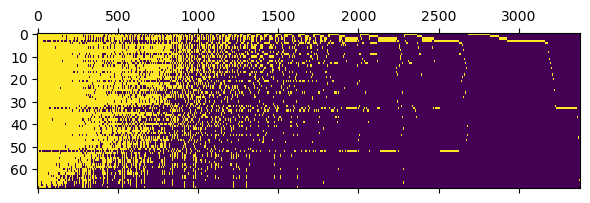

In [13]:
plt.matshow(df_genus[sorted_states].T, aspect=14);

The program ends here.

## Environment
This is the base anaconda environment. No additional package is installed.

In [14]:
import sys
print(sys.executable.split('/')[-3])

anaconda3
